In [1]:
import tensorflow as tf
from model import bioRNN
from training import supervised_train_step
from xdg_stimulus import MultiStimulus
from vis import trial_movie
import matplotlib.pyplot as plt
from IPython.display import HTML


--> Loading parameters...
--> Parameters successfully loaded.

Using 'Multistim' stimulus file.


In [2]:
# Choose GPU
gpu_idx = 0
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[gpu_idx], 'GPU')

In [3]:
# Model hyper-params
hidden_size = 128
output_size = 9
synapse_config = 'full'

# Optimization hyper-params
learning_rate = 1e-2
n_iterations = 2000

# Which task?
task_idx = 16 # DMS

# Data generator
stim = MultiStimulus()

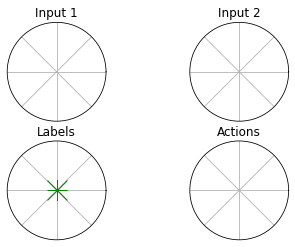

In [4]:
# Look at a sample trial
name, inputs, labels, mask, rewards = stim.generate_trial(task_idx)
animation = trial_movie(inputs[:,10,:], labels[:,10,:])
HTML(animation.to_html5_video())

In [5]:
# Define a model
rnn = bioRNN(hidden_size, output_size, synapse_config=synapse_config)

In [6]:
# Train the model
opt = tf.keras.optimizers.Adam(learning_rate=float(learning_rate))
loss_list = []
acc_list = []
print('\n=== TRAINING === \n')
for i in range(n_iterations):
    name, inputs, labels, mask, rewards = stim.generate_trial(task_idx)
    metrics = supervised_train_step(rnn, opt, inputs, labels, train_mask=mask)
    loss = round(float(metrics['loss']), 2)
    acc = round(float(metrics['argmax_accuracy']), 2)
    dec_acc = round(float(metrics['decision_accuracy']), 2)
    fix_acc = round(float(metrics['fixation_accuracy']), 2)
    loss_list.append(loss)
    acc_list.append(acc)
    if i%100==0:
        print(f'Iter: {i} | Loss: {loss} | Acc: {acc} | Fixation Acc: {fix_acc} | Decision Acc: {dec_acc}')


=== TRAINING === 

Iter: 0 | Loss: 2.08 | Acc: 0.03 | Fixation Acc: 0.0 | Decision Acc: 0.18
Iter: 100 | Loss: 0.48 | Acc: 0.85 | Fixation Acc: 1.0 | Decision Acc: 0.0
Iter: 200 | Loss: 0.35 | Acc: 0.86 | Fixation Acc: 0.97 | Decision Acc: 0.16
Iter: 300 | Loss: 0.27 | Acc: 0.89 | Fixation Acc: 0.97 | Decision Acc: 0.3
Iter: 400 | Loss: 0.2 | Acc: 0.92 | Fixation Acc: 0.97 | Decision Acc: 0.57
Iter: 500 | Loss: 0.19 | Acc: 0.92 | Fixation Acc: 0.96 | Decision Acc: 0.5
Iter: 600 | Loss: 0.14 | Acc: 0.95 | Fixation Acc: 0.98 | Decision Acc: 0.81
Iter: 700 | Loss: 0.13 | Acc: 0.96 | Fixation Acc: 0.98 | Decision Acc: 0.85
Iter: 800 | Loss: 0.08 | Acc: 0.98 | Fixation Acc: 0.99 | Decision Acc: 0.97
Iter: 900 | Loss: 0.08 | Acc: 0.98 | Fixation Acc: 0.99 | Decision Acc: 0.93
Iter: 1000 | Loss: 0.07 | Acc: 0.98 | Fixation Acc: 0.99 | Decision Acc: 0.96
Iter: 1100 | Loss: 0.05 | Acc: 0.99 | Fixation Acc: 0.99 | Decision Acc: 0.96
Iter: 1200 | Loss: 0.06 | Acc: 0.99 | Fixation Acc: 1.0 | Deci

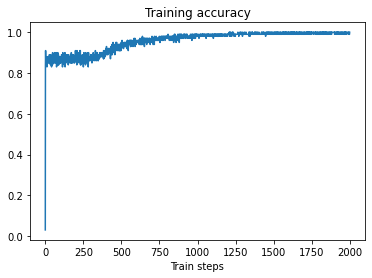

In [7]:
# Plot accuracies
plt.plot(acc_list)
plt.title('Training accuracy')
plt.xlabel('Train steps')
plt.show()

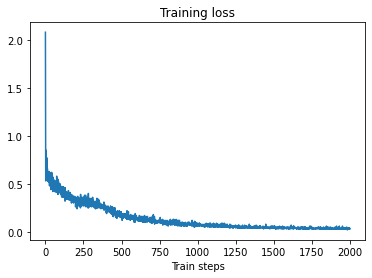

In [8]:
# Plot loss
plt.plot(loss_list)
plt.title('Training loss')
plt.xlabel('Train steps')
plt.show()

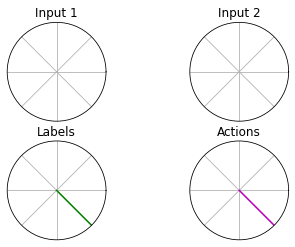

In [25]:
# Look at an example trial with the model's actions
name, inputs, labels, mask, rewards = stim.generate_trial(task_idx)
results = rnn.do_trial(inputs)
action_idxs = tf.math.argmax(results['outputs'], axis=-1) # (T, B)
actions = tf.one_hot(action_idxs, output_size)
animation = trial_movie(inputs[:,0,:], labels[:,0,:], actions[:,0,:])
HTML(animation.to_html5_video())